<a href="https://colab.research.google.com/github/victor-roris/ML-learning/blob/master/ComputerVision/ComputerVision_TextRecognition_EASYOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EASYOCR

Implementation of an easy OCR with pretrained models for [+40 languages](https://github.com/JaidedAI/EasyOCR/issues/91).

Github : [link](https://github.com/JaidedAI/EasyOCR)

Notebook adapation from [link](https://colab.fan/easyocr)

## Install

In [1]:
!pip install easyocr --no-deps # Colab already has all dependencies

     |████████████████████████████████| 13.5MB 236kB/s 


# Dataset

We stored the basic easyocr examples to see how it works

In [2]:
# load example images
!npx degit JaidedAI/EasyOCR/examples -f

npx: installed 1 in 3.07s
> destination directory is not empty. Using --force, continuing
> cloned JaidedAI/EasyOCR#master


In [3]:
# list them
!ls -l

total 3248
-rw-r--r-- 1 root root   59898 Jul 14 03:04 chinese.jpg
-rw-r--r-- 1 root root 1740957 Jul 14 03:04 english.png
-rw-r--r-- 1 root root  487995 Jul 14 03:04 example2.png
-rw-r--r-- 1 root root  488641 Jul 14 03:04 example.png
-rw-r--r-- 1 root root  168376 Jul 14 03:04 french.jpg
-rw-r--r-- 1 root root   42159 Jul 14 03:04 japanese.jpg
-rw-r--r-- 1 root root  225531 Jul 14 03:04 korean.png
drwxr-xr-x 1 root root    4096 Jul 10 16:29 sample_data
-rw-r--r-- 1 root root   82229 Jul 14 03:04 thai.jpg


In [4]:
lang_exs = {
    "ch_sim" : "chinese.jpg",
    "en" : "english.png",
    "fr" : "french.jpg",
    "ja" : "japanese.jpg",
    "ko" : "korean.png",
    "th" : "thai.jpg",
}

## Run easyocr

### Simple example

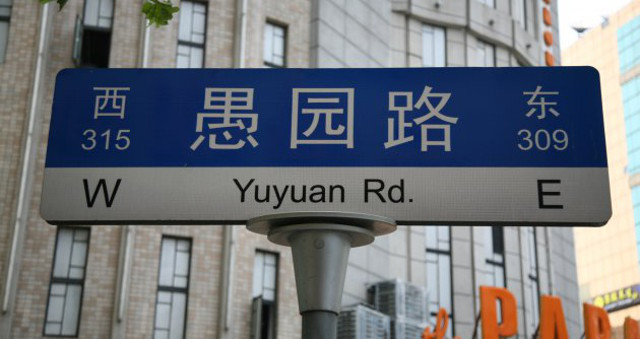

In [5]:
# show an image
import PIL
from PIL import ImageDraw
im = PIL.Image.open("chinese.jpg")
im

In [6]:
# Create a reader to do OCR.
# If you change to GPU instance, it will be faster. But CPU is enough.
# (by MENU > Runtime > Change runtime type > GPU, then redo from beginning )
import easyocr
reader = easyocr.Reader(['ch_sim','en'])

Download complete
Download complete


In [7]:
# Doing OCR. Get bounding boxes.
bounds = reader.readtext('chinese.jpg')
bounds

[([[189, 75], [469, 75], [469, 165], [189, 165]], '愚园路', 0.375499963760376),
 ([[86, 80], [134, 80], [134, 128], [86, 128]], '西', 0.4045345187187195),
 ([[517, 81], [565, 81], [565, 123], [517, 123]], '东', 0.9989598989486694),
 ([[78, 126], [136, 126], [136, 156], [78, 156]], '315', 0.8125918507575989),
 ([[514, 126], [574, 126], [574, 156], [514, 156]],
  '309',
  0.49717220664024353),
 ([[226, 170], [414, 170], [414, 220], [226, 220]],
  'Yuyuan Rd.',
  0.8261918425559998),
 ([[79, 173], [125, 173], [125, 213], [79, 213]], 'W', 0.984811007976532),
 ([[529, 173], [569, 173], [569, 213], [529, 213]], 'E', 0.8405551910400391)]

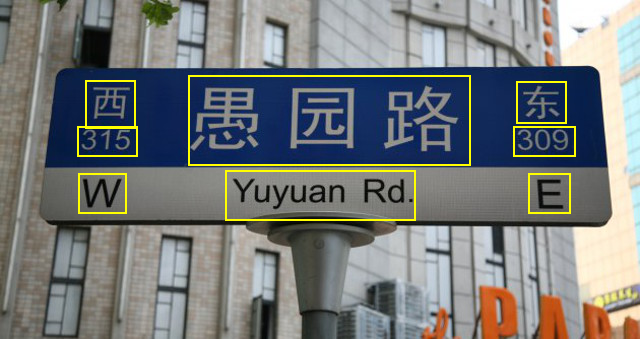

In [8]:
# Draw bounding boxes
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)

### Loop

In [9]:
# Draw bounding boxes
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

Example ch_sim - chinese.jpg


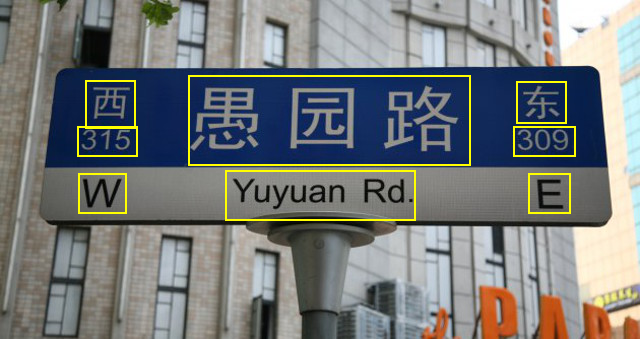

-----------------
Example en - english.png
Download complete


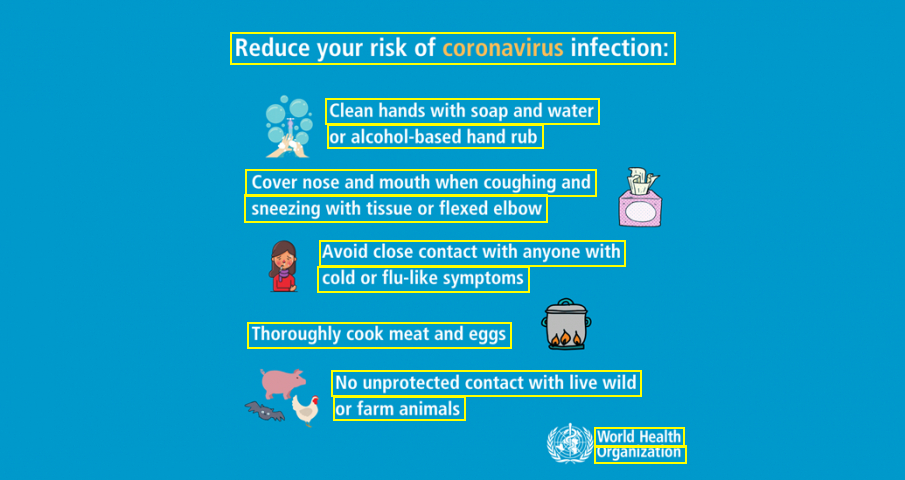

-----------------
Example fr - french.jpg


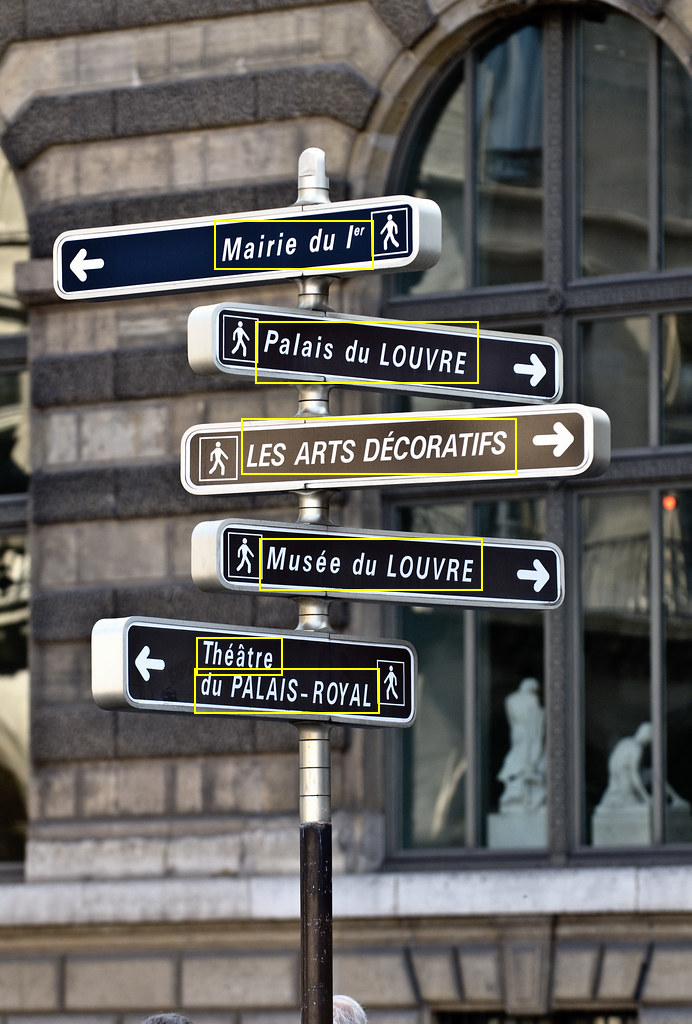

-----------------
Example ja - japanese.jpg
Download complete


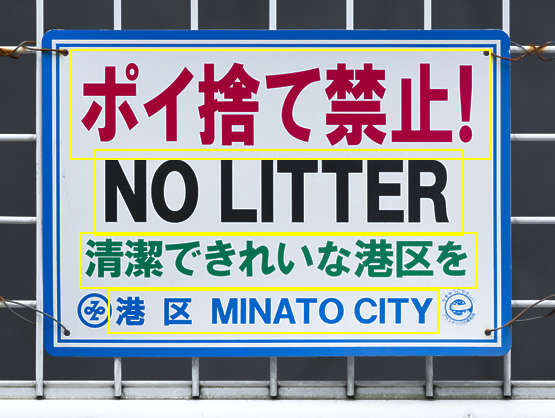

-----------------
Example ko - korean.png
Download complete


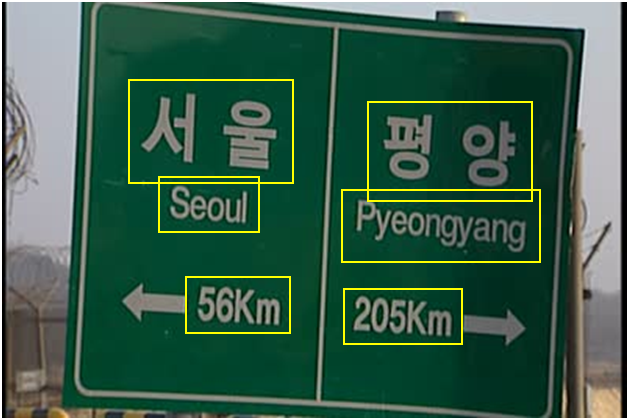

-----------------
Example th - thai.jpg
Download complete


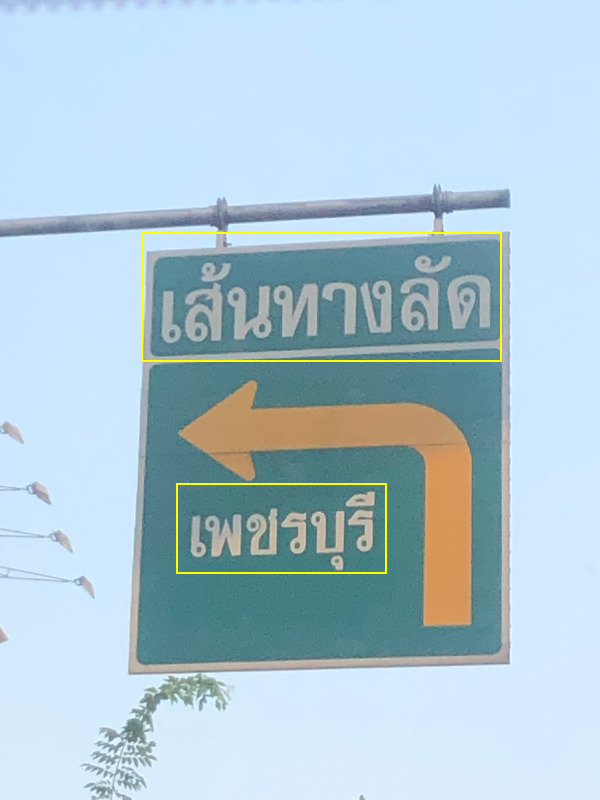

-----------------


In [10]:
import easyocr
import PIL
from PIL import ImageDraw

for lang in lang_exs:

  print(f"Example {lang} - {lang_exs[lang]}")

  img = lang_exs[lang]
  reader = easyocr.Reader([lang,'en'])
  bounds = reader.readtext(img)

  im = PIL.Image.open(img)
  display(draw_boxes(im, bounds))
  print("-----------------")

## DOC Segmentation application

We check if the easyocr library could be applied directly in documents.

In [11]:
testds_path = "docseg"

In [12]:
import os
from IPython.display import clear_output

if not os.path.isdir(testds_path):
  print(" > Downloading the test dataset ")
  !wget https://www.dropbox.com/s/yow9mjgt7cs35c0/validation..doc..pages.tar.gz?dl=0  -O docpages.tar.gz
  !tar -zxvf docpages.tar.gz && ! mv validation..doc..pages {testds_path}
  !rm docpages.tar.gz
  clear_output()
  print(" > Downloaded the test dataset ")

 > Downloaded the test dataset 


In [13]:
# Draw bounding boxes
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

There are optional arguments for readtext function, decoder can be 'greedy'(default), 'beamsearch', or 'wordbeamsearch'. For 'beamsearch' and 'wordbeamsearch', you can also set beamWidth (default=5). Bigger number will be slower but can be more accurate. For multiprocessing, you can set workers and batch_size. Current version converts image into grey scale for recognition model, so contrast can be an issue. You can try playing with contrast_ths, adjust_contrast and filter_ths. allowlist and blocklist accept input in string (like this blocklist = '!&$%').

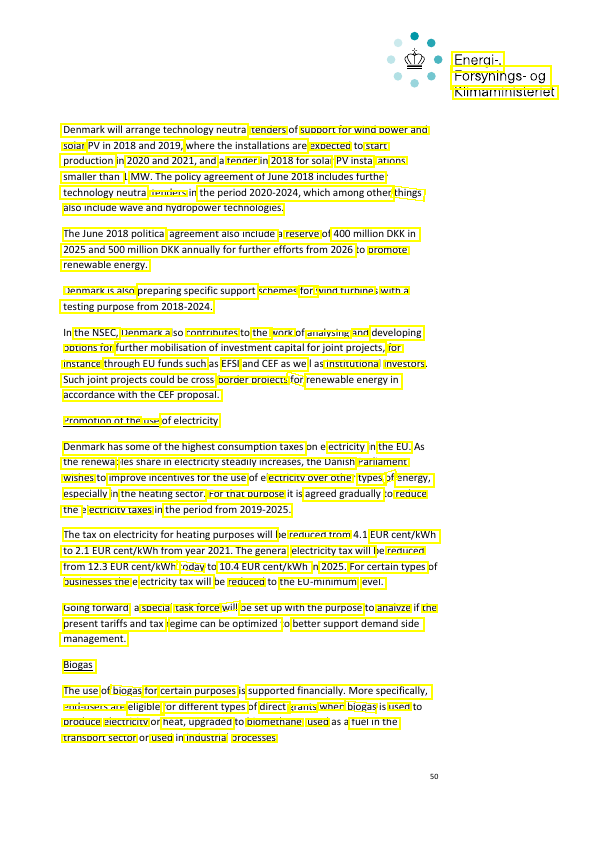

-----------------
Texts in the doc : 134
0 : Energi-,
1 : Forsynings- og
2 : Klirnaministeriet
3 : Denmark will arrange technology neutra
4 : telugr_
5 : suuL art far if Dir ang
6 : wnere the irstallatioris are
7 : PVin 2018 and 2019
8 : sulal
9 : eudeltg[
10 : start
11 : pruductior
12 : 2020 and 2021, and
13 : ulg fur Sola
14 : PVinsta
15 : tinnar
16 : gtirn_
17 : sialler than
18 : MH. The policy agreement of June Z!IB includes furthe
19 : technalogy neutra
20 : the period 2O2O-2O24, which among other
21 : ainigs
22 : are
23 : also include uaye and hydrupowgr tecnriclogigs
24 : Ihg June Z!lg palitica
25 : AO million DKK in
26 : agreement also include
27 : TgsgTH3
28 : 2Q25 and 5Q0 million DKK annually far further gfforts tram 2OZG
29 : grillLtg
30 : renewable erergy.
31 : preparing specific suppart
32 : fur
33 : Eanarisli
34 : snel
35 : aairnturnire
36 : "eft=
37 : testing purpose from 2018-2024.
38 : develaping
39 : the ISEL,
40 : che
41 : farnalr4
42 : cirfrinlfes
43 : nr
44 : aLb
4

In [14]:
import easyocr
import PIL
from PIL import ImageDraw
import glob
import random
from IPython.display import Image, display

rnd_img_filepath = random.choice(glob.glob(f'{testds_path}/*.png'))

reader = easyocr.Reader(['en'])
bounds = reader.readtext(rnd_img_filepath, decoder='wordbeamsearch', beamWidth=15)

im = PIL.Image.open(rnd_img_filepath)
display(draw_boxes(im, bounds))

print("-----------------")

print(f"Texts in the doc : {len(bounds)}")
for index, bound in enumerate(bounds):
  print(f"{index} : {bounds[index][1]}")